# Zomato data analysis project


# step 1- Importing libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# step2- create the data frame

In [97]:
data=pd.read_csv("Zomato data .csv")
print(data)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# convert the data type of column - rate

In [99]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
data['rate']=data['rate'].apply(handlerate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# type of resturant

In [102]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


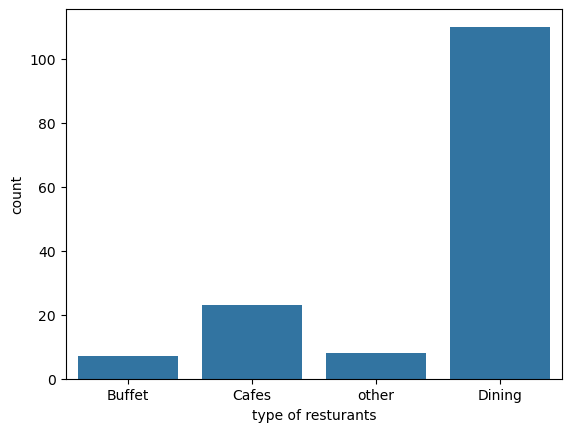

In [106]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("type of resturants")
plt.show()

# conclusion - majority of the resturant falls in dining category

Text(0, 0.5, 'votes')

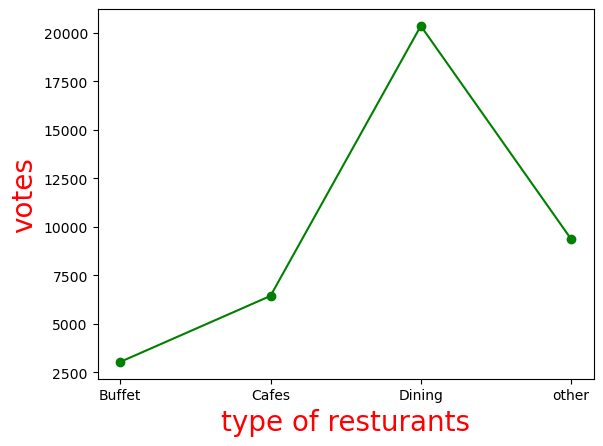

In [108]:
grouped_data=data.groupby("listed_in(type)")['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of resturants", c="red", size=20)
plt.ylabel("votes", c="red",size=20)

# conclusion - dining resturants has recieved maximum votes

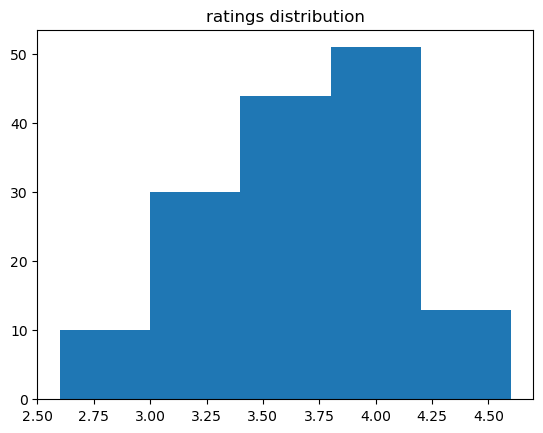

In [114]:
plt.hist(data['rate'],bins=5)
plt.title('ratings distribution')
plt.show()

# conclusion - dining resturants has recieved ratings from 3.5 to 4

# average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

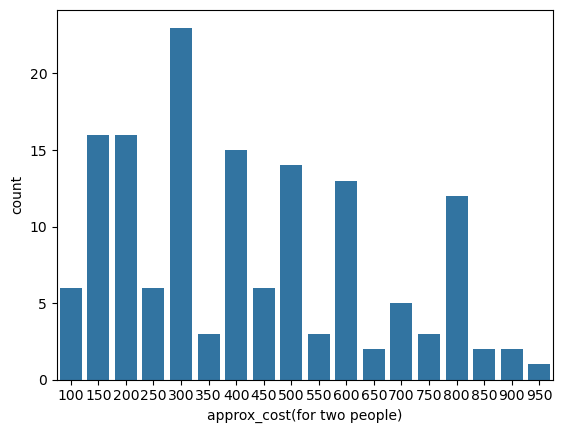

In [119]:
couple_data= data['approx_cost(for two people)']
sns.countplot(x=couple_data)


# conclusion - the majority of couples preferr resturants with an approximate cost of 300 rupees

# wich modes receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

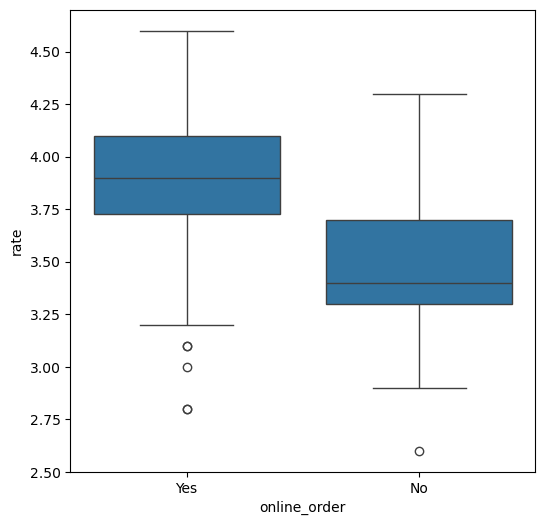

In [127]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

# conclusion - offline order received lower rating in comparison to online order

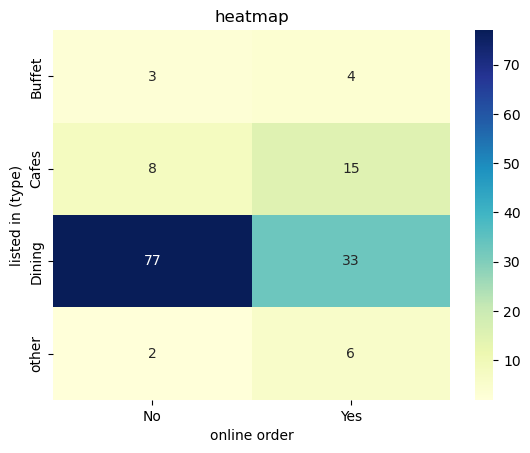

In [138]:
pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt="d")
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed in (type)")
plt.show()